# Experiment 04  -  RC and LRC Circuits in the Frequency Domain

Date: October 3, 2025

Name: Mufaro Machaya

Partner's name: Omar hui

### Introductory Notes

**Measurement Goal:** The purpose of this experiment is to measure the transient response in both an RC and LRC circuit based on changes to the resonant frequency.

In [1]:
from common import *

## Measurements of Inductance, Resistance, and Capacitance

> Next week, in experiment 05, you will be making comparisons of your transient data (time domain, lab 02 and 03), with this experiment in the frequency domain. To make the comparisons, you should be working with the same resistors, capacitors and inductors. To be sure, take some time to measure your components and compare to your previous lab notes.

Resistor: $0.990 \pm ((0.990)\times \frac{0.5}{100} + 3 \times 0.001)$ $k\Omega$ = $990 \pm 8$ $\Omega$

In [2]:
resistance = 990
resistance_uncert = (0.990 * 0.005 + 3 * 0.001) * 1000

Capacitor: $489.0 \pm (489.0 \times \frac{2}{100} + 5 \times 0.1)$ $nF$ = $(489 \pm 10) \times 10^{-9}$ F

In [3]:
capacitance_rc = 489e-9
capacitance_rc_uncert = (489 * 2/100 + 5 * 0.1) * 1e-9

*Note*: Each of the values are still the same as before.

# Measuring the RC circuit

> The rest of this experiment consists of taking data using the spreadsheet code, and then fitting the results. You will do this for an RC circuit and then an LRC circuit. Make sure you set these circuits up exactly the way you did in Lab 02 and Lab 03. Don't forget to take notes here as you go.

> For the data entry, we include the data entry code below. *You should already have the data_entry2 package installed (either on the PHYS229 server, or you completed the installation during the prelab), but if you need to re-install it, uncomment lines 5-7 and run.*

In [4]:
import numpy as np
import data_entry2
import array
import pandas as pd
import matplotlib.pyplot as plt

**Measurement Plan:** We're beginning at $50$ Hz and going up by at least $20$ Hz each time, hopefully taking around 8 points in the 50-500 point range and 3-4 in the 500-2000 Hz range for modeling. These points don't need to be evenly spaced to get a good graph, but the goal is to get a good number of points around the region of greatest decrease in amplitude based on frequency. 

Input Amplitude $V_0 = 4.500 \pm \frac{0.001}{2\sqrt{3}}$ $V_{pp}$

In [5]:
de = data_entry2.sheet("rc-data-final-copy.csv")

Sheet name: rc-data-final-copy.csv


**Note, 8/4/25 12:43 PM:** `data_entry2` works fine on my computer, but it will not show the data on my final HTML generation (for some reason). Please just trust that it actually was entered, and I'll add this to actually print the data to this notebook.

In [6]:
import csv

def print_csv_file(filepath):
    with open(filepath, 'r') as csv_file:
        reader  = csv.reader(csv_file)
        headers = next(reader)
        data    = list(reader)

        print(tabulate(data, headers=headers, tablefmt="grid"))

In [7]:
print_csv_file("rc-data-final-copy.csv")

+----------+-------------+-------+-------------+
|   f (Hz) |   u[f] (Hz) |    V0 |       u[V0] |
+==========+=============+=======+=============+
|       50 | 0.000288675 | 4.38  | 0.00288675  |
+----------+-------------+-------+-------------+
|      100 | 0.000288675 | 4.2   | 0.00288675  |
+----------+-------------+-------+-------------+
|      150 | 0.000288675 | 3.98  | 0.00288675  |
+----------+-------------+-------+-------------+
|      200 | 0.000288675 | 3.7   | 0.00288675  |
+----------+-------------+-------+-------------+
|      250 | 0.000288675 | 3.44  | 0.00288675  |
+----------+-------------+-------+-------------+
|      300 | 0.000288675 | 3.14  | 0.00288675  |
+----------+-------------+-------+-------------+
|      350 | 0.000288675 | 2.93  | 0.00288675  |
+----------+-------------+-------+-------------+
|      400 | 0.000288675 | 2.71  | 0.00288675  |
+----------+-------------+-------+-------------+
|      450 | 0.003       | 2.53  | 0.00288675  |
+----------+--------

*Note:* I'm measuring the frequency directly from the wave generator, so the uncertainty is measured as square using the last digit as $0.0000001$ Hz. I'm also measuring the amplitude directly off of the oscilloscope using its internal measurement system, so the uncertainty is measured as square/instrumental based on the last digit.

**[3:19]** I actually changed this system at measurement 9. I've switched to using the frequency directly off of the oscilloscope, as they have higher uncertainty (they fluctuate quite a bit). The amplitude measurements are still the same.

## Plot As You Take the Data

> Don't forget to take notes as you go, and be sure to enter uncertainty estimates and justification as you go along.  It is also good practice to plot your data whale you are taking it. The code below can be run any time you want a fresh look at the data you are entering.

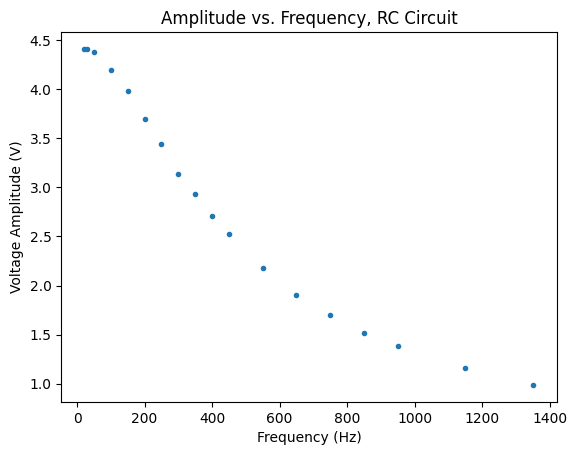

In [8]:
data_rc = np.loadtxt('data/rc-data.csv', delimiter=',',skiprows=1)

rc_circuit_data = Dataset(
    x=data_rc[:,0], 
    dx=data_rc[:,1], 
    y=data_rc[:,2], 
    dy=data_rc[:,3]
)

plt.errorbar(
    rc_circuit_data.x,
    rc_circuit_data.y,
    xerr=rc_circuit_data.dx,
    yerr=rc_circuit_data.dy,
    marker='.',
    linestyle='',
    label="measured data")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage Amplitude (V)')
plt.title('Amplitude vs. Frequency, RC Circuit')
plt.show()

**Observations:** 

- [3:08 PM, 3 data points in] It seems to be an almost linear drop, which is worrying
- [3:12 PM, 6 data points in] It's still maintaining a linear drop curve, which is curious. The theoretical function is $$V_c(f) = V_{in}^0 / \sqrt{1 + (2 \pi f RC)^2},$$ which is definitely not linear, but we've made a very small increase in frequency thus far, and we've been told that the rate of decrease should increase eventually, so we'll just keep on going (I guess).
- [3:53, finished] The data ended up curving out, so it all worked out.

# Measuring the LRC circuit

Inductance: $458 \pm \frac{1}{2\sqrt{3}}$ $\mu H$ = $(458 \pm 0.3) \times 10^{-6}$ $H$

In [9]:
inductance = 458e-6
inductance_uncert = 1/(2 * np.sqrt(3)) * 1e-6

Capacitance: $0.096 \pm \frac{0.001}{2\sqrt{3}}$ $nF$ = $(96 \pm 0.3) \times 10^{-12}$ $F$
- This is based off of Lab 3, Round 5, and it's roughly the same. Therefore, our resonant frequency should be around $722000$ Hz.

In [10]:
capacitance_lrc = 0.096e-9 * 1e12
capacitance_uncert_lrc = 0.001/(2*np.sqrt(3)) * 1e-9 * 1e12

> You can repeat the whole process for the LRC part of the experiment. Just start a new spreadsheet below, with a different name.

In [11]:
de = data_entry2.sheet("lrc-data-final-copy.csv")

Sheet name: lrc-data-final-copy.csv


In [12]:
print_csv_file("lrc-data-final-copy.csv")

+----------+-------------+--------+-------------+
|   f (Hz) |   u[f] (Hz) |     V0 |       u[V0] |
+==========+=============+========+=============+
|    89770 |     2.88675 | 0.274  | 0.000288675 |
+----------+-------------+--------+-------------+
|   210100 |    28.8675  | 0.692  | 0.000288675 |
+----------+-------------+--------+-------------+
|   328900 |    28.8675  | 1.18   | 0.00288675  |
+----------+-------------+--------+-------------+
|   609800 |    28.8675  | 3.45   | 0.00288675  |
+----------+-------------+--------+-------------+
|   668400 |    28.8675  | 4.04   | 0.00288675  |
+----------+-------------+--------+-------------+
|   710200 |    28.8675  | 4.19   | 0.00288675  |
+----------+-------------+--------+-------------+
|   770000 |    28.8675  | 3.78   | 0.00288675  |
+----------+-------------+--------+-------------+
|   830500 |    28.8675  | 3.03   | 0.00288675  |
+----------+-------------+--------+-------------+
|   969000 |   288.675   | 1.74   | 0.00288675  |


## Plot LRC data while acquiring

> Again, plot the data as you measure, in particular ensuring you have sufficient data in regions that are changing rapidly as a function of your dependent variable.

**Note:** For the frequency on this measurement set, we're measuring a full period then inverting it to determine the period, and we're measuring the uncertainty of this measurement as square. 

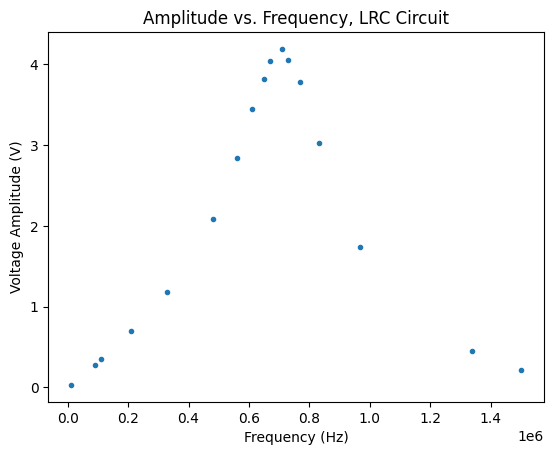

In [13]:
data_lrc = np.loadtxt('data/lrc-data.csv', delimiter=',',skiprows=1)

lrc_circuit_data = Dataset(
    x=data_lrc[:,0], 
    dx=data_lrc[:,1], 
    y=data_lrc[:,2], 
    dy=data_lrc[:,3]
)

plt.errorbar(
    lrc_circuit_data.x,
    lrc_circuit_data.y,
    xerr=lrc_circuit_data.dx,
    yerr=lrc_circuit_data.dy,
    marker='.',
    linestyle='',
    label="measured data")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage Amplitude (V)')
plt.title('Amplitude vs. Frequency, LRC Circuit')
plt.show()

## Fitting Your Data

> The code cells below for fitting have been updated to include the two functions you worked with in the prelab exercise. Now you will use them to fit your data. Remember that fits of non-linear functions can be sensitive to the inital parameters given, so consider some strategies to make informed guesses.

### Fit RC data

> Will fit RC response curve to:
$$V_c(f)=\frac{V_{in}^0}{\sqrt{1+(2\pi fRC)^2}}$$
Need to define new function where f -> x, and RC -> tau, and $V_{in}^0$ -> V0

```python
def RCresp_func(x, tau, V0):
    return V0/(1+(2*np.pi*tau*x)**2)
```

In [14]:
gopts=GraphingOptions(
    x_label='Frequency',
    y_label='Amplitude',
    x_units='Hz',
    y_units='V'
)

In [15]:
model_rc=RCResponseFitParameters(
    amplitude=4.5,
    time_constant=resistance * capacitance_rc,
    offset=0
)

results_rc = autofit_dataset(rc_circuit_data, gopts, model_rc)
results_rc.tabulate()

+---------------+------------+---------------+
| Measurement   |      Value |   Uncertainty |
+===============+============+===============+
| amplitude     |  4.44      |     0.0008588 |
+---------------+------------+---------------+
| time_constant |  0.0005072 |     2.431e-07 |
+---------------+------------+---------------+
| offset        | -0.01605   |     0.0008525 |
+---------------+------------+---------------+
Chi^2 = 97.248


**Observations:**
- This model got $\chi^2 = 97.248$, so the autofit model may not match the data (but I think this is unlikely, as I will explain later).
- It obtained
    - $V_0 = 4.4400 \pm 0.008$ V
    - $\tau = (5.072 \pm 0.002) \times 10^{-4}$ $\Omega$ F
    - $V_{offset} = -0.01605 \pm 0.0008$ V.
- Initial parameter guesses were based on direct calculations, like using $\tau = RC$ and the amplitude as $4.5$ $V_{pp}$ from the Wave Generator

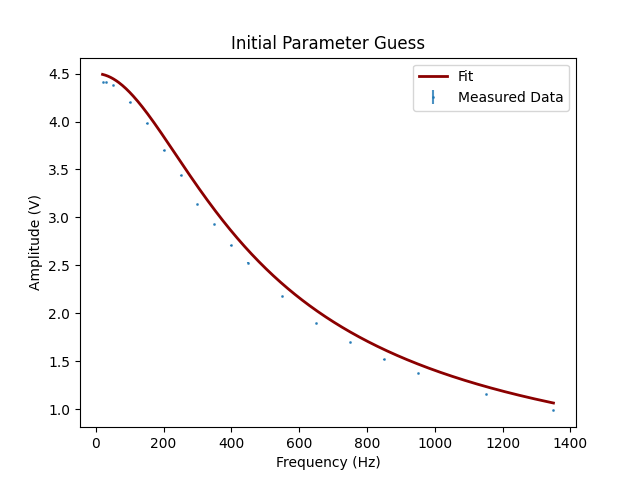

In [16]:
display(results_rc.initial_guess_graph)

**Observations:** The initial parameter guesses was almost perfect! It seems that the data almost perfectly matched the model, just missing an offset.

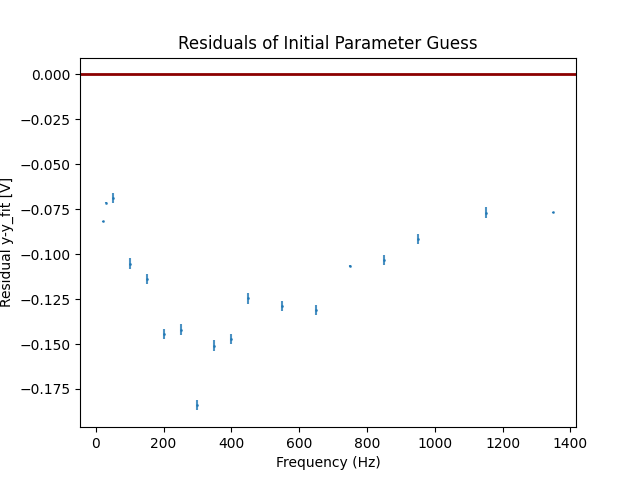

In [17]:
display(results_rc.initial_guess_residuals_graph)

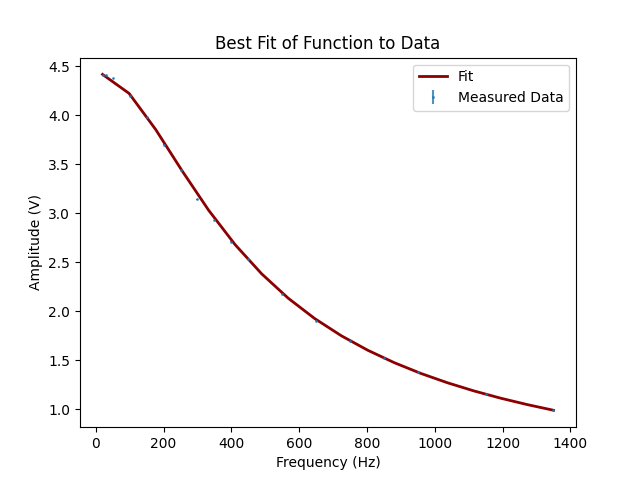

In [18]:
display(results_rc.autofit_graph)

**Observations:** The data seems to match the model as best as possible from visual inspection.

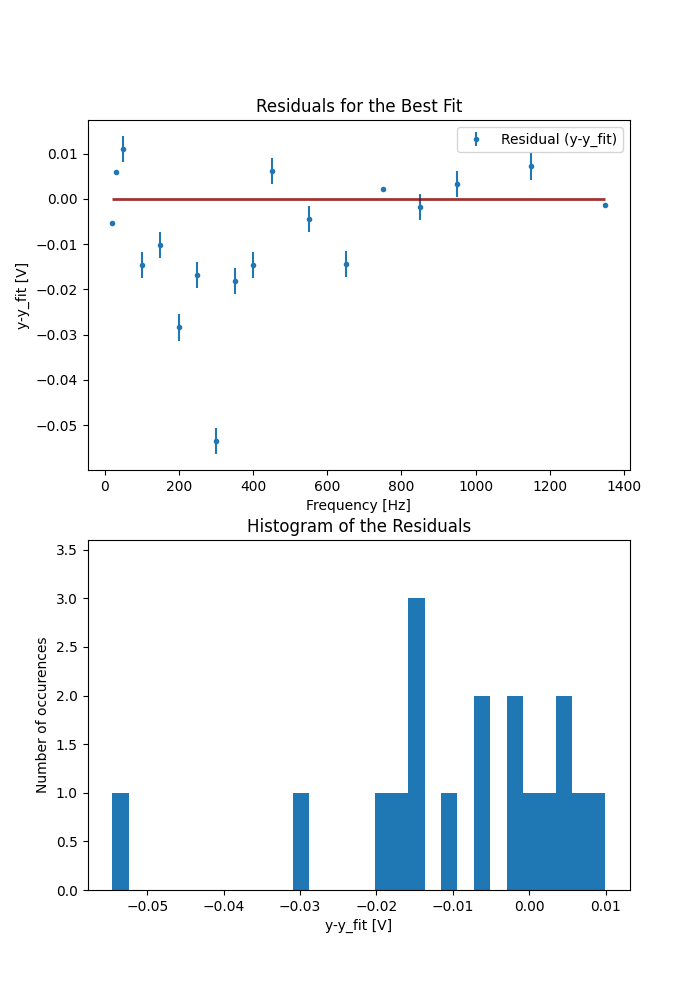

In [19]:
display(results_rc.autofit_residuals_graph)

**Observations:** The model describes the data fairly well, as the high $\chi^2$ can be explained by the spread of the residuals graph, showing that the uncertainties were clearly underestimated. This is probably due to the heavy use of instrumental uncertainty in the amplitude measurements on the oscilloscope, which doesn't account for the noise measurements. For a more accurate measurement, we'd probably want to directly use the bars, but due to the amount of time remaining on this lab, we're just going to continue measuring directly from the oscilloscope. 

### Fit LRC model

> For the LRC circuit need to plot the amplitude vs. frequency for the resonantor:
$$V_R^0(f)=\frac{V_{in}^0}{\sqrt{1+(\frac{2\pi}{\gamma f})^2(f^2-f_0^2)^2}}$$
with f -> x, $\gamma$ -> gamma, $V_{in}^0$ -> Vin, and $f_0$ -> f0

> Add function:

```python
def LRCresp_func(x, f0, Vin, gamma):
    return Vin/(np.sqrt(1+(2*np.pi/(gamma*x))**2*(x**2-f0**2)**2))`
```

In [20]:
print("%.3e" % (resistance / (2 * inductance)))

1.081e+06


In [21]:
model_lrc=LRCResponseFitParameters(
    amplitude = 4.5,
    gamma = resistance / (2 * inductance),
    resonant_frequency = 722000
)

results_lrc = autofit_dataset(lrc_circuit_data, gopts, model_lrc)
results_lrc.tabulate()

+--------------------+----------------+---------------+
| Measurement        |          Value |   Uncertainty |
+====================+================+===============+
| amplitude          |      3.68      |      0.002334 |
+--------------------+----------------+---------------+
| gamma              |      1.304e+06 |    962.2      |
+--------------------+----------------+---------------+
| resonant frequency | 511900         |     59.03     |
+--------------------+----------------+---------------+
Chi^2 = 381108.924


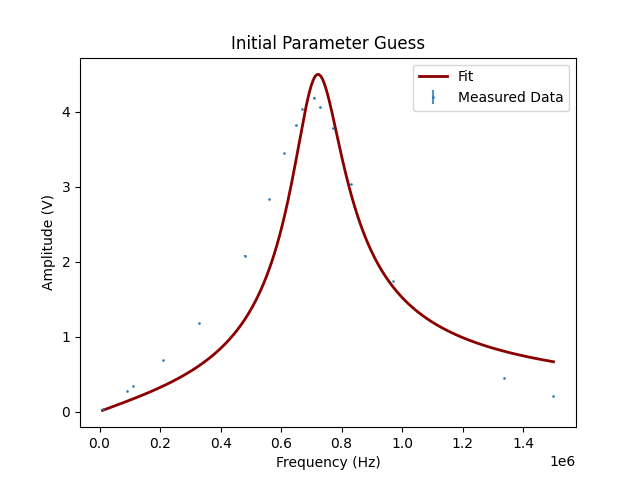

In [22]:
display(results_lrc.initial_guess_graph)

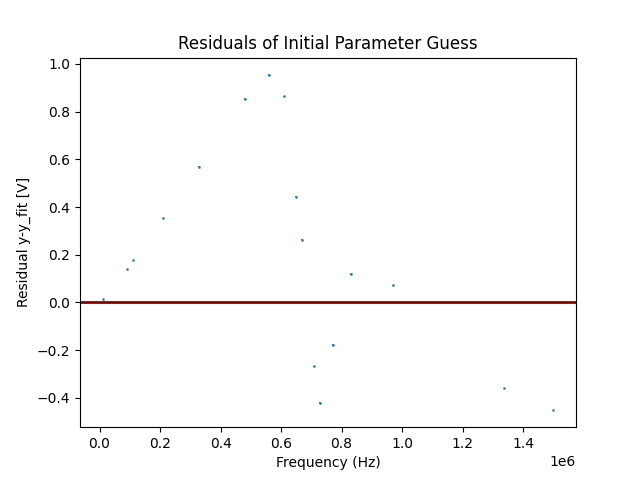

In [23]:
display(results_lrc.initial_guess_residuals_graph)

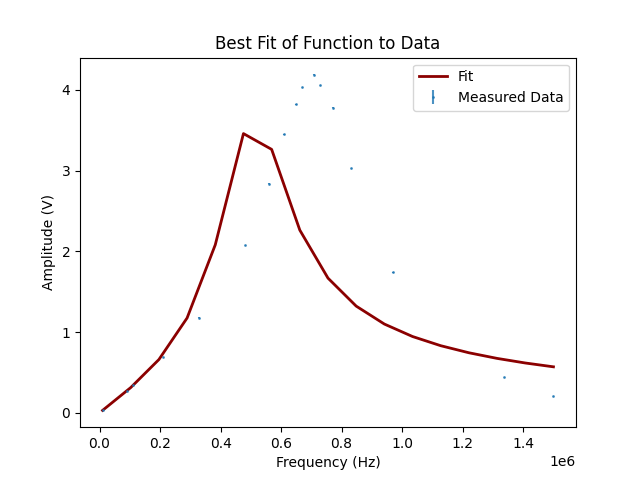

In [24]:
display(results_lrc.autofit_graph)

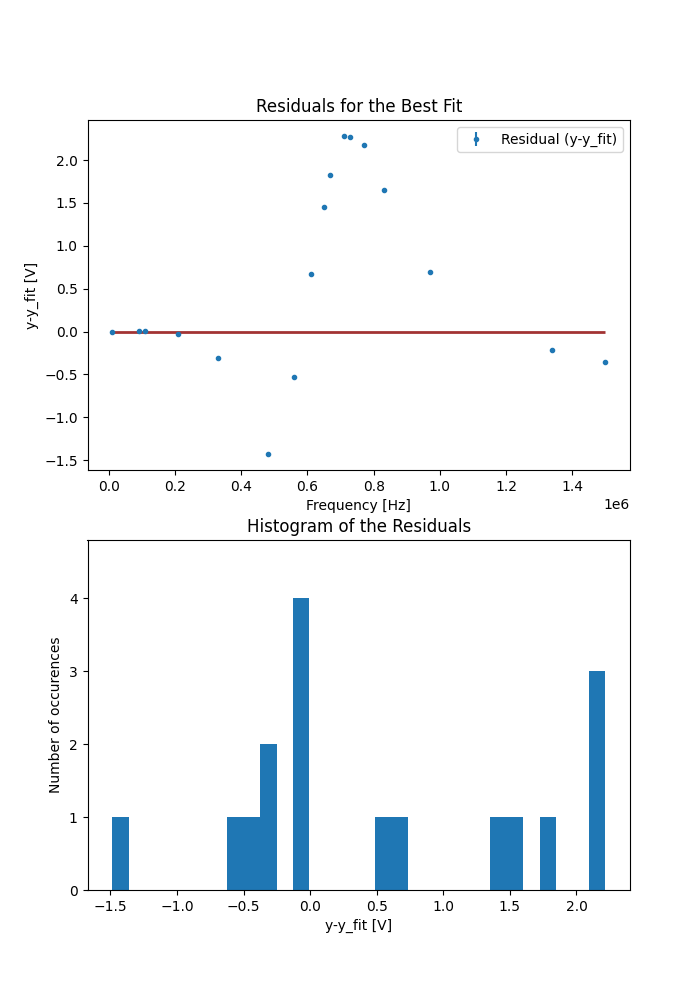

In [25]:
display(results_lrc.autofit_residuals_graph)

**Observations:**
- [4:35 PM] The graph needs more points towards the top. It's kind of mountain-like. It's skipping the peak though, so we need more points near the peak.
- [4:52 PM] The graph seems to miss the peak? Why? It's so strange. It's presently measuring a resonant frequency of about 600,000 Hz, but the graph clearly shows that it's closer to the assumption of 700,000 Hz.
- [*Post Lab*, 8/4/25 12:23 PM] This fit produced the results:
    - $A=3.68$ V
    - $\gamma = 1.308 \times 10^{6}$ $\Omega/H$
    - $f_0 = 511900$ Hz.
  but this is, obviously, really bad quality. The fit seems to completely be off due to the uncertainties being clearly underestimated, as the initial parameter guess has a much higher $\chi^2$ but undoubtedly matches the data much better. For the sake of verifying this theory, I'll manually set a higher uncertainty for each of the values then see how the other parameters of the fit change.

### Verifying that the uncertainties were underestimated:

In [26]:
lrc_circuit_data.dy = np.full_like(lrc_circuit_data.y, 0.1)

In [27]:
model_lrc=LRCResponseFitParameters(
    amplitude = 4.5,
    gamma = resistance / (2 * inductance),
    resonant_frequency = 700000
)

results_lrc = autofit_dataset(lrc_circuit_data, gopts, model_lrc)
results_lrc.tabulate()

+--------------------+----------------+---------------+
| Measurement        |          Value |   Uncertainty |
+====================+================+===============+
| amplitude          |      4.218     |       0.05418 |
+--------------------+----------------+---------------+
| gamma              |      1.529e+06 |   55970       |
+--------------------+----------------+---------------+
| resonant frequency | 689500         |    3191       |
+--------------------+----------------+---------------+
Chi^2 = 7.816


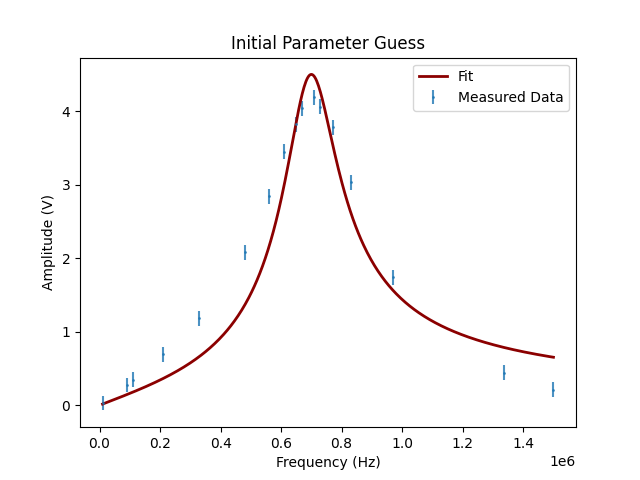

In [28]:
display(results_lrc.initial_guess_graph)

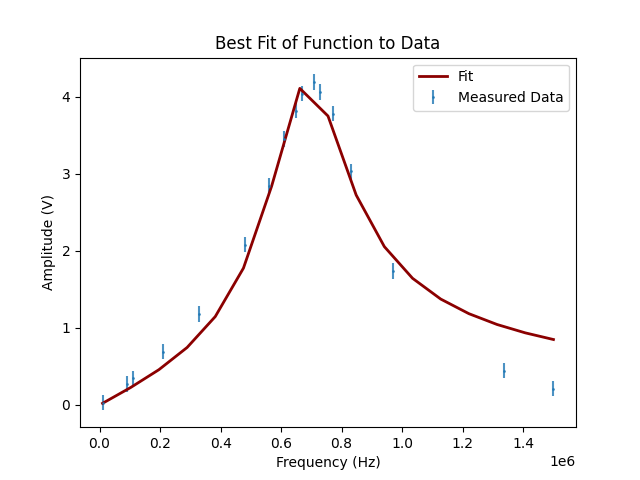

In [29]:
display(results_lrc.autofit_graph)

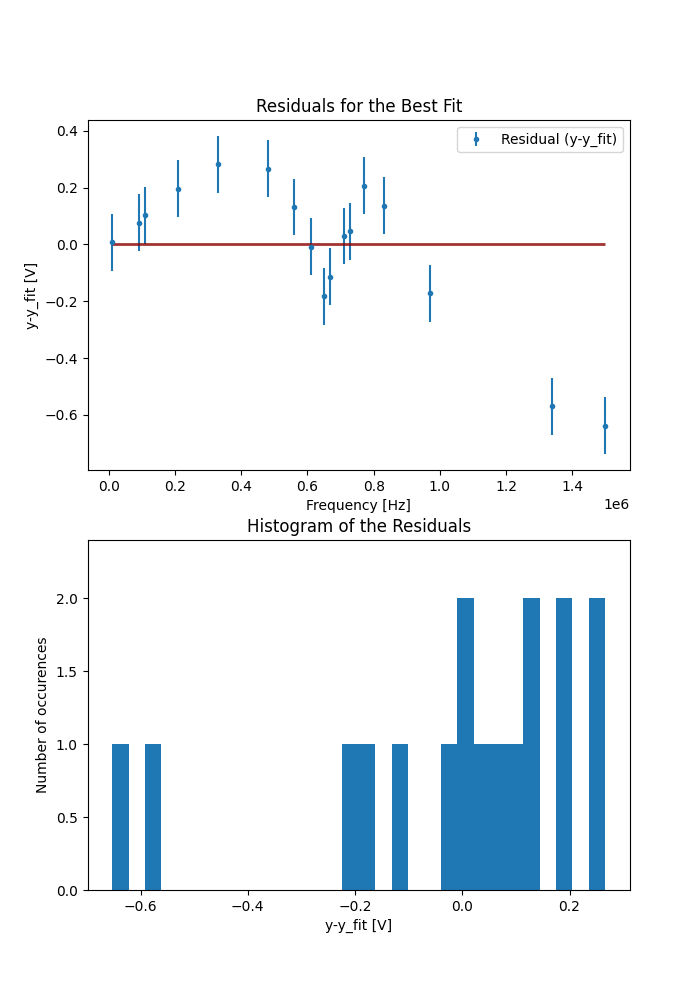

In [30]:
display(results_lrc.autofit_residuals_graph)

**Observations:**
- [*Post Lab*, 8/4/25 12:31 PM] This proves the above point: the residuals were underestimated, and that is why the model is so bad. If we set a much higher, but still reasonable uncertainty to the measurement, then the model becomes much, much better at describing the data. The $\chi^2$ went down from $381108.924$ to $7.816$, the resonant frequency matches much closer with our expectations (our expectation was about $700,000$ Hz, and this graph went up from $511900$ Hz to $689500$ Hz), and the only value that deviated more from our expectation was the time constant, which increased from $1.3 \times 10^6$ to $1.5 \times 10^6$ (when the expectation is $1.1 \times 10^6$).

## Don't forget to write some comments about the quality of the fit.

> Also remember that you can circle back and add more data (if you're doing the analysis in the lab) if it looks like you need more, or find some problems. You might also need to adjust the model if there's a clear issue that can be addressed simply. Just remember to keep writing notes about what you are doing. This is not a lab report; it is supposed to be a diary of what you are doing all the way through the lab. Feel free to keep adding notebook cells below.